<a href="https://colab.research.google.com/github/nickname8888/Quaternions-LPI/blob/main/eng_gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip '/content/drive/MyDrive/datasets/EnglishFnt.zip' -d '/content/drive/MyDrive/datasets/English5/'

In [ ]:
# !unzip '/content/drive/MyDrive/datasets/Fnt58.zip' -d '/content/drive/MyDrive/datasets/English/Fnt'

In [ ]:
45**45

248063644451341145494649182395412689744530581492654164321720600128173828125

In [ ]:
# import pathlib
# data_dir = pathlib.Path('/content/drive/MyDrive/datasets/English/Fnt/')
# image_count = len(list(data_dir.glob('*/*.png')))
# print(image_count)
# import os
# content = os.listdir('/content/drive/MyDrive/datasets/English/Fnt/Sample061')
# len(content)

62992


In [ ]:
#first making a discriminator

In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
batch_size = 32
img_size = 128

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/datasets/English/Fnt/',
    batch_size = batch_size, image_size = (img_size, img_size),
    seed=111, validation_split=0.2, subset='training'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/datasets/English/Fnt/',
    batch_size = batch_size, image_size = (img_size, img_size),
    seed=111, validation_split=0.2, subset='validation'
)

Found 62992 files belonging to 62 classes.
Using 50394 files for training.
Found 62992 files belonging to 62 classes.
Using 12598 files for validation.


In [ ]:
#normalizing dataset
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda xx, yy: (normalization_layer(xx), yy))
val_ds = val_ds.map(lambda xx, yy: (normalization_layer(xx), yy))

In [ ]:
basic_discriminator_model = tf.keras.models.Sequential()
basic_discriminator_model.add(layers.Conv2D(32, 5, 1, activation='relu', input_shape=(img_size, img_size, 3)))
basic_discriminator_model.add(layers.Conv2D(64, 3, 2, activation='relu'))
basic_discriminator_model.add(layers.Dropout(0.2))
basic_discriminator_model.add(layers.Conv2D(64, 3, 2, activation='relu'))
basic_discriminator_model.add(layers.Dropout(0.2))
basic_discriminator_model.add(layers.Conv2D(128, 3, 2, activation='relu'))
basic_discriminator_model.add(layers.Dropout(0.3))
basic_discriminator_model.add(layers.Conv2D(128, 3, 2, activation='relu'))
basic_discriminator_model.add(layers.Dropout(0.3))
basic_discriminator_model.add(layers.Flatten())
# basic_discriminator_model.add(layers.Dense(256, activation='relu'))
# basic_discriminator_model.add(layers.Dropout(0.3))
basic_discriminator_model.add(layers.Dense(128, activation='relu'))
basic_discriminator_model.add(layers.Dropout(0.3))
basic_discriminator_model.add(layers.Dense(62))

basic_discriminator_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 124, 124, 32)      2432      
                                                                 
 conv2d_6 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 dropout_5 (Dropout)         (None, 61, 61, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 dropout_6 (Dropout)         (None, 30, 30, 64)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 dropout_7 (Dropout)         (None, 14, 14, 128)      

In [ ]:
basic_discriminator_model.compile('adam', tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = basic_discriminator_model.fit(train_ds, validation_data=val_ds, epochs=15)

Epoch 1/15
  24/1575 [..............................] - ETA: 18:04 - loss: 4.1315 - accuracy: 0.0182

In [ ]:
#now starting work on gan

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/datasets/English5/Fnt/',
    batch_size = batch_size, image_size = (img_size, img_size),
    label_mode=None,
    # seed=111, validation_split=0.2, subset='training'
)
train_dataset = train_dataset.map(lambda x: x / 255.0)

Found 62992 files belonging to 1 classes.


In [ ]:
# for a, b in train_dataset:
#   print(a)
#   print(b)
#   break
len(train_dataset)

1969

In [ ]:
dataset_new = train_dataset.take(500)

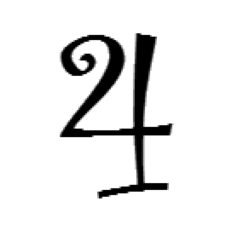

In [ ]:
for x in train_dataset:
    plt.axis("off")
    plt.imshow((x.numpy() * 255).astype("int32")[0])
    break

In [ ]:
import os
os.chdir('/content/drive/MyDrive/datasets/models/eng-gan-1')

In [ ]:
def create_discriminator():
  model = tf.keras.models.Sequential()
  model.add(layers.Conv2D(32, 5, 1, activation='relu', input_shape=(img_size, img_size, 3)))
  model.add(layers.Conv2D(64, 3, 2, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(64, 3, 2, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(128, 3, 2, activation='relu'))
  model.add(layers.Dropout(0.3))
  model.add(layers.Conv2D(128, 3, 2, activation='relu'))
  model.add(layers.Dropout(0.3))
  model.add(layers.Flatten())
  # model.add(layers.Dense(256, activation='relu'))
  # model.add(layers.Dropout(0.3))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(1))
  
  return model

In [ ]:
d = create_discriminator()
d.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 61, 61, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 128)       0

In [ ]:
def create_generator():
    model = tf.keras.Sequential()
    
    # creating Dense layer with units 7*7*256(batch_size) and input_shape of (100,)
    model.add(layers.Dense(8*8, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # model.add(layers.Dense(7*7*4, use_bias=False, input_shape=(100,)))
    # model.add(layers.BatchNormalization())
    # model.add(layers.LeakyReLU())

    model.add(layers.Reshape((8, 8, 1)))

    model.add(layers.Conv2DTranspose(32, 3, strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, 3, strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, 3, strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(128, 3, strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(128, 3, strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(256, 3, strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2D(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    return model

In [ ]:
g = create_generator()
g.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                6400      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 1)           0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 8, 8, 32)         288       
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 8, 8, 32)        

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def d_loss(real_output, fake_output):
  real_loss = cross_entropy(tf.ones_like(real_output), real_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
  return real_loss + fake_loss

def g_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
noise_dim = 100
num_of_generated_samples = 16
seed = tf.random.normal([num_of_generated_samples, noise_dim])

In [ ]:
generator = create_generator()
discriminator = create_discriminator()

@tf.function
def train_step(images):
  global generator, discriminator
  noise = tf.random.normal([num_of_generated_samples, noise_dim])

  with tf.GradientTape() as gtape, tf.GradientTape() as dtape:
    generated_images = generator(noise, training=True)
    real_output = discriminator(images, training=True)
    fake_output = discriminator(generated_images, training=True)
    gloss = g_loss(fake_output)
    dloss = d_loss(real_output, fake_output)
  generator_gradient = gtape.gradient(gloss, generator.trainable_variables)
  discriminator_gradient = dtape.gradient(dloss, discriminator.trainable_variables)
  generator_optimizer.apply_gradients(zip(generator_gradient, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradient, discriminator.trainable_variables))

In [ ]:
from tqdm import tqdm

def train_gan(dataset, epochs):
  for epoch in range(epochs):
    for image_batch in tqdm(dataset):
      train_step(image_batch)
    
    noise = tf.random.normal([num_of_generated_samples, noise_dim])
    generated_images = generator.predict(noise)
    dim=(8,8)
    figsize=(10,10)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
      plt.subplot(dim[0], dim[1], i+1)
      plt.imshow(generated_images[i].reshape(128, 128, 3), interpolation='nearest')
      plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image %d.png' %epoch)

In [ ]:
train_gan(dataset_new, 20)

100%|██████████| 500/500 [09:07<00:00,  1.09s/it]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████| 500/500 [09:00<00:00,  1.08s/it]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data 